### Student Details

**Student Name: AKHIL RAGHU NATH**

**Student ID:23048417**

# Task 2: Probability Theory

## Option ? (which option did you pick?
# I used the same 2 given examples in Task

Example 1 -
A gamble is placed depending on the result of the dice.
This result of a dice roll is a uniform distribution, as all dice outcomes are equally likely; 1/6 probablility
The result is discrete as the result of a dice throw can only take on values of: 1,2,3,4,5,6

if dice = 1,2,3 will lose -1,

if dice = 4 will draw, 0,

if dice = 5 will win, 1,

if dice = 6 will win, 2

We know this is a fair game theoretically, but what will the simulations show?

Simulate 1000 dice results and record both the result of the dice, and the result of the gamble.
To then calculate the expected value & standard deviation of both the result of the dice and the result of the gamble.

Finally plot the frequency of the dice rolls & plotting the frequency of the gamble result.

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations

(Provide details of the manual calculations)

The mean of Dice Rolls is :  3.49
The Standard Deviation of Dice Rolls is: 1.719273102214998
The mean of Gamble Result is :  -0.002
The Standard Deviation of GambleResult is: 1.1618932825350208
--------------------------------------------------------------------------------


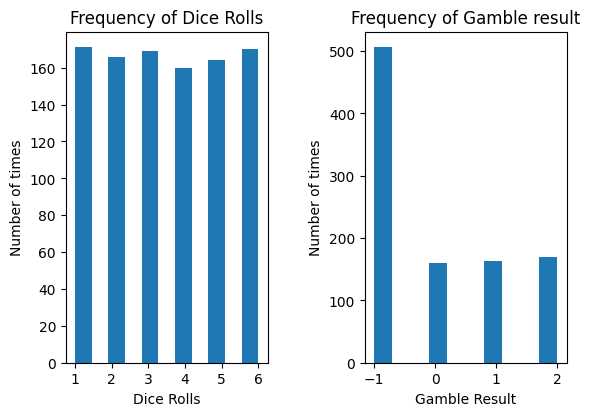

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set the random seed for reproducibility
np.random.seed(1)

# simulate 1000 dice rolls
dice = np.random.randint(1, 7, 1000)

# assingining values to gamble as per dice roll
gamble=[0]*1000
for i in range(1000):
 if dice[i] in [1,2,3] :
   gamble[i]=-1
 elif dice[i] in [4] :
  gamble[i]= 0
 elif dice[i] in [5]:
  gamble[i]=1
 else :
  gamble[i]=2

mean_dice=sum(dice)/1000 # calculate mean of dice rolls
variance_dice=sum((i-mean_dice)**2 for i in dice)/1000
std_dev_dice =variance_dice**0.5 # calculate standard deviation of dice rolls

mean_gamble =sum(gamble)/1000  # calculating mean of gamble
variance_gamble=sum((i-mean_gamble)**2 for i in gamble)/1000
std_dev_gamble =variance_gamble**0.5 # calculating Standard Deviation of gamble

print('The mean of Dice Rolls is : ',mean_dice)
print('The Standard Deviation of Dice Rolls is:',std_dev_dice)

print('The mean of Gamble Result is : ',mean_gamble)
print('The Standard Deviation of GambleResult is:',std_dev_gamble)

print(40*'--')
# plotting the graph

plt.subplot(1,2,1)
plt.hist(dice,bins=11)
plt.xticks(range(1, 7))
plt.xlabel('Dice Rolls')
plt.ylabel('Number of times')
plt.title('Frequency of Dice Rolls')

plt.subplot(1,2,2)
plt.hist(gamble)
plt.xlabel('Gamble Result')
plt.ylabel('Number of times')
plt.title('Frequency of Gamble result')

plt.tight_layout(pad=3)
plt.show()

 Example 2

Test results of some made up exam/test/whatever really
This will be a normally distributed variable, and will be continious as test result could take on any value
How much would it costs to pay people for good scores?

Using properties of Normal Distribution
We expect 99.7% of data within mean +- 3( std . dev)
So marks would be roughly within 0-100, using a mean of 50, and std of 15
Going to consider paying students for grades below:

If test result < 50 , get nothing
If test result is between 50 & 75 = 5
If test result is between 75 & 100 = 10
Going to run for 10,000 simulations

Total_cost for 10000 people is  27250
costs to pay people for good scores : 2.725


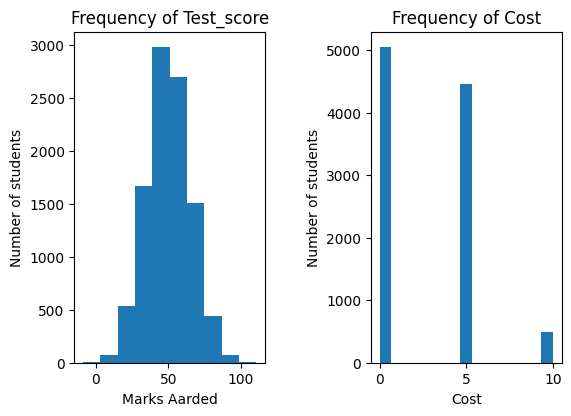

In [16]:
#given mean=50 and Standard deviation =15
#assigning the values

mean=50
std_dev=15

#simulation
Test_score = np.random.normal(mean, std_dev, 10000)

#assigning cost values as per marks
cost =[0]*10000
for i in range(10000):
 if Test_score[i] <50 :
  cost[i]=0
 if 50 <= Test_score[i] <75:
  cost[i]=5
 if 75 <= Test_score[i] <= 100:
  cost[i]=10

#print(cost)
Total_cost=sum(cost)
print("Total_cost for 10000 people is ",Total_cost)

#print mean of cost
mean=Total_cost/10000
print ("costs to pay people for good scores :",mean)

#plotting the graph

plt.subplot(1,2,1)
plt.hist(Test_score)
plt.xlabel('Marks Aarded')
plt.ylabel('Number of students')
plt.title('Frequency of Test_score')

plt.subplot(1,2,2)
plt.hist(cost,bins=15)
plt.xlabel('Cost')
plt.ylabel('Number of students')
plt.title('Frequency of Cost')

plt.tight_layout(pad=3)
plt.show()

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [4]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

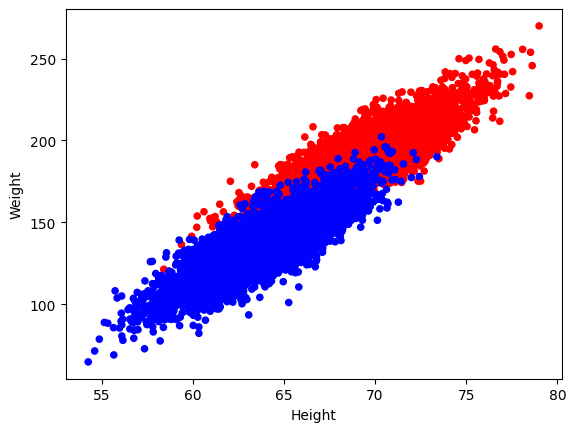

In [5]:
colour={"Male": 'red',"Female":'blue'}
data.plot(kind='scatter',x='Height',y='Weight',c=data.Gender.map(colour));

###### Discuss: Do you think there is resonable separation?
No, there are some overlapping

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [7]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [8]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X,y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [9]:
from sklearn.naive_bayes import GaussianNB

Gender_model=GaussianNB().fit(X_train,y_train)

### Test the algorithm
Using the test data

In [10]:
from sklearn.metrics import accuracy_score

predict =Gender_model.predict(X_test)

### Plot the random samples

In [11]:
print(X_test)
print(50*'--')
print(predict)
print(50*'--')
print(y_test.values)


         Height      Weight
36    69.076171  197.488243
2697  71.781996  205.169235
1605  66.577516  178.488157
1978  68.064349  188.375746
8332  66.038690  142.755779
...         ...         ...
4709  70.287376  203.531509
214   65.903301  172.575231
9415  63.360510  134.955817
178   64.808621  162.379541
8659  68.575614  163.228850

[3300 rows x 2 columns]
----------------------------------------------------------------------------------------------------
['Male' 'Male' 'Male' ... 'Female' 'Female' 'Male']
----------------------------------------------------------------------------------------------------
['Male' 'Male' 'Male' ... 'Female' 'Male' 'Female']


Calculate the accuracy of the test by using accuracy_score

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(predict,y_test)
print(accuracy_score)

0.8775757575757576


Simulate 5000 sample of random person with random Height and Weight

In [13]:
np.random.seed(0)
new_Height =np.random.randint(54,80,5000)
new_Weight= np.random.randint(64,269,5000)
data_frame=pandas.DataFrame({"Height":new_Height,"Weight":new_Weight})

Apply the predict function

In [14]:
a_predict=Gender_model.predict(data_frame)
print(a_predict)
data_frame.insert(0,"Gender",a_predict)
print(50*'--')
print(data_frame)

['Male' 'Female' 'Male' ... 'Male' 'Female' 'Male']
----------------------------------------------------------------------------------------------------
      Gender  Height  Weight
0       Male      66     190
1     Female      69      78
2       Male      75     164
3     Female      54     199
4     Female      57     112
...      ...     ...     ...
4995  Female      55      76
4996  Female      67      81
4997    Male      74     194
4998  Female      54     100
4999    Male      79     266

[5000 rows x 3 columns]


Plot the map

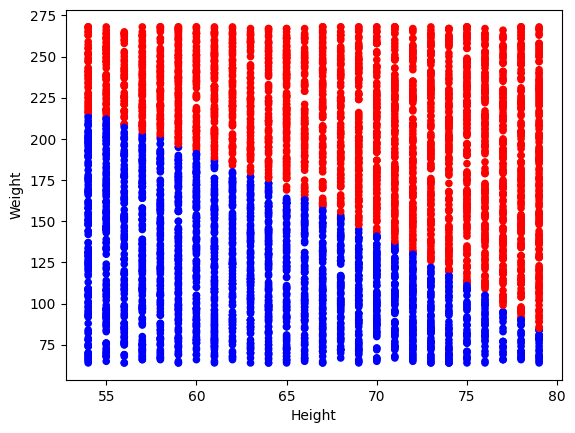

In [15]:
colour={"Male": 'red',"Female":'blue'}
data_frame.plot(kind='scatter',x='Height',y='Weight',c=data_frame.Gender.map(colour));